<a href="https://colab.research.google.com/github/Marco-Barraza/Proyectos-Diplomado/blob/main/Electromobility_Plus/Electromobility_Plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivos de la tarea: Analisis caso de negocios “Electromobility Plus” para definir un mercado objetivo y estimar un volumen de ventas, aplicando las librerías y recursos de Python para hacer análisis, visualización de datos y definir escenarios de probabilidad.

In [ ]:
#cargar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stt
from math import sqrt

In [ ]:
#crear df con dataset
df = pd.read_csv("/content/public_transportation_statistics_by_zip_code.csv")

In [ ]:
#imprimir información preliminar df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   zip_code                          33120 non-null  int64  
 1   public_transportation_pct         33120 non-null  float64
 2   public_transportation_population  33120 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 776.4 KB


In [ ]:
#nuevo nombre en columnas
df.rename(columns={"zip_code":"codigo_postal","public_transportation_population":"transporte_bruto","public_transportation_pct":"transporte_porcentaje" },inplace=True)
df.columns

Index(['codigo_postal', 'transporte_porcentaje', 'transporte_bruto'], dtype='object')

In [ ]:
#cambio tipo de dato codigo postal
df["codigo_postal"] = df["codigo_postal"].astype("object")
df["codigo_postal"].dtype

dtype('O')

In [ ]:
#numero unico codigo postal (se descartan zonas repetidas y uso de drop_duplicates)
df['codigo_postal'].nunique()

33120

In [ ]:
#Nan cero
df.isnull().sum()

codigo_postal            0
transporte_porcentaje    0
transporte_bruto         0
dtype: int64

In [ ]:
#exploración primeras 3 filas
df.head(3)

,codigo_postal,transporte_porcentaje,transporte_bruto
0,1379,3.3,13
1,1440,0.4,34
2,1505,0.9,23


In [ ]:
#explorar ultimas 3 filas
df.tail(3)

,codigo_postal,transporte_porcentaje,transporte_bruto
33117,61777,0.0,0
33118,61816,0.0,0
33119,61275,1.0,19


In [ ]:
#exploración estadistica (tratar valores atipicos e inconsistencias)
df.describe()

,transporte_porcentaje,transporte_bruto
count,3.312000e+04,33120.000000
mean,-1.115137e+07,230.352748
std,8.549920e+07,1313.382153
min,-6.666667e+08,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,1.100000e+00,41.000000
max,1.000000e+02,35139.000000


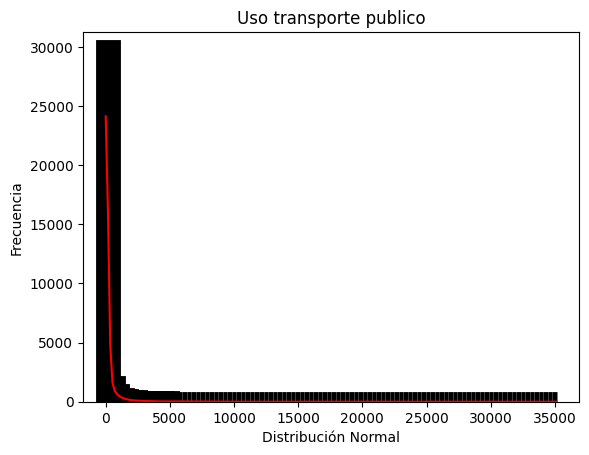

In [ ]:
#distribución en transporte bruto (fuerte asimetria derecha)
ax= sb.histplot(df["transporte_bruto"], bins=100, kde=True, color="red", linewidth=15, alpha=1)
ax.set(title="Uso transporte publico", xlabel="Distribución Normal", ylabel="Frecuencia")
plt.show()

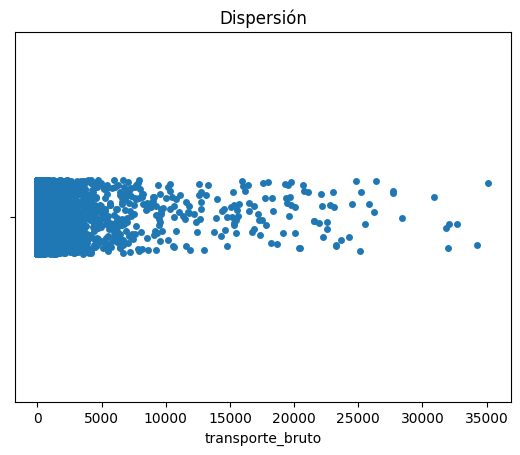

In [ ]:
#dispersión trasporte bruto
sb.stripplot(x="transporte_bruto", data=df)
plt.title("Dispersión")
plt.show()

In [ ]:
#datos menores a cero
ceros = (df['transporte_porcentaje']<0).sum()
print(f"Datos menores a cero: {ceros}")
ceros = round(((df["transporte_porcentaje"]<0).sum()/df["transporte_porcentaje"].count())*100, 2)
print(f"Porcentaje de datos menores a cero: {ceros}%")

Datos menores a cero: 554
Porcentaje de datos menores a cero: 1.67%


In [ ]:
#tratamiento inconsistencia
df.loc[df["transporte_porcentaje"]<0, ["transporte_porcentaje"]] = np.nan #asignar nan a datos menores que cero
df.dropna(axis=0, how="any", inplace=True) #eliminar nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32566 entries, 0 to 33119
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   codigo_postal          32566 non-null  object 
 1   transporte_porcentaje  32566 non-null  float64
 2   transporte_bruto       32566 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1017.7+ KB


In [ ]:
# crear nueva categoria (muy bajo, bajo, medio bajo, medio, medio alto, alto, muy alto)
df.loc[(df["transporte_bruto"]>=0) & (df["transporte_bruto"]<5000), ["volumen_transporte"]] = "muy_bajo"
df.loc[(df["transporte_bruto"]>=5000) & (df["transporte_bruto"]<10000), ["volumen_transporte"]] = "bajo"
df.loc[(df["transporte_bruto"]>=10000) & (df["transporte_bruto"]<15000), ["volumen_transporte"]] = "medio_bajo"
df.loc[(df["transporte_bruto"]>=15000) & (df["transporte_bruto"]<20000), ["volumen_transporte"]] = "medio"
df.loc[(df["transporte_bruto"]>=20000) & (df["transporte_bruto"]<25000), ["volumen_transporte"]] = "medio_alto"
df.loc[(df["transporte_bruto"]>=25000) & (df["transporte_bruto"]<30000), ["volumen_transporte"]] = "alto"
df.loc[(df["transporte_bruto"]>=30000) & (df['transporte_bruto']<=35139), ["volumen_transporte"]] = "muy_alto"

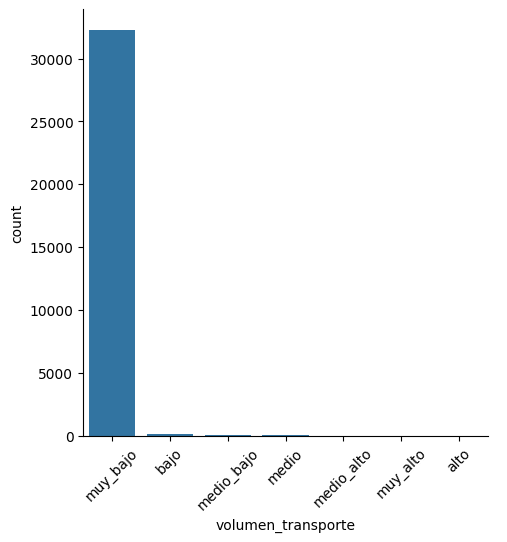

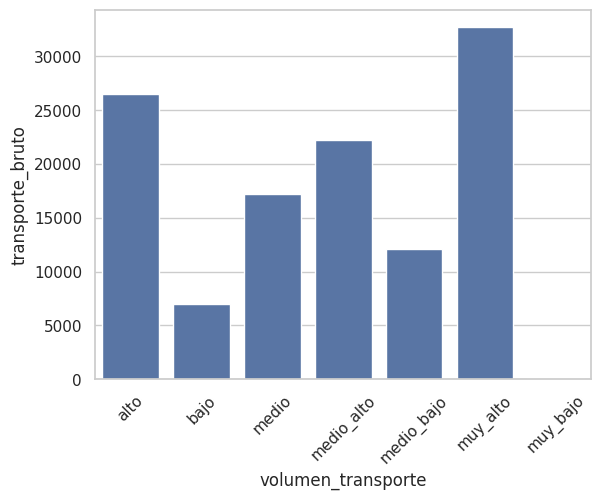

In [ ]:
#analisis volumne_transporte
sb.catplot(x="volumen_transporte", kind="count", data=df)
plt.xticks(rotation=45)
plt.show()

cat = df.groupby("volumen_transporte")[["transporte_bruto"]].mean().reset_index()
sb.set(style="whitegrid")
ax = sb.barplot(x="volumen_transporte", y="transporte_bruto", data=cat)
plt.xticks(rotation=45)
plt.show()

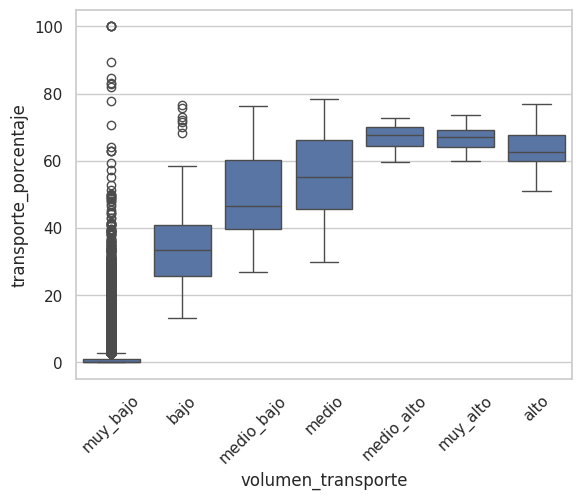

Porcentaje de cada grupo en 'volumen_transporte'
volumen_transporte
alto           0.03
bajo           0.44
medio          0.13
medio_alto     0.07
medio_bajo     0.14
muy_alto       0.02
muy_bajo      99.18
dtype: float64


In [ ]:
#analisis transporte_porcentaje
sb.boxplot(x="volumen_transporte", y="transporte_porcentaje", data=df)
plt.xticks(rotation=45)
plt.show()

total_valores = df["volumen_transporte"].count()
grupo = round(df.groupby("volumen_transporte").size() / total_valores * 100, 2)

print("Porcentaje de cada grupo en 'volumen_transporte'")
print(grupo)

In [ ]:
#crear nueva caterogia por uso de trasporte publico
df["uso_transporte"] = df["transporte_porcentaje"].apply(lambda x: "alto_uso" if x > 0.1 else "bajo_uso" )
df.head()

,codigo_postal,transporte_porcentaje,transporte_bruto,volumen_transporte,uso_transporte
0,1379,3.3,13,muy_bajo,alto_uso
1,1440,0.4,34,muy_bajo,alto_uso
2,1505,0.9,23,muy_bajo,alto_uso
3,1524,0.5,20,muy_bajo,alto_uso
4,1529,1.8,32,muy_bajo,alto_uso


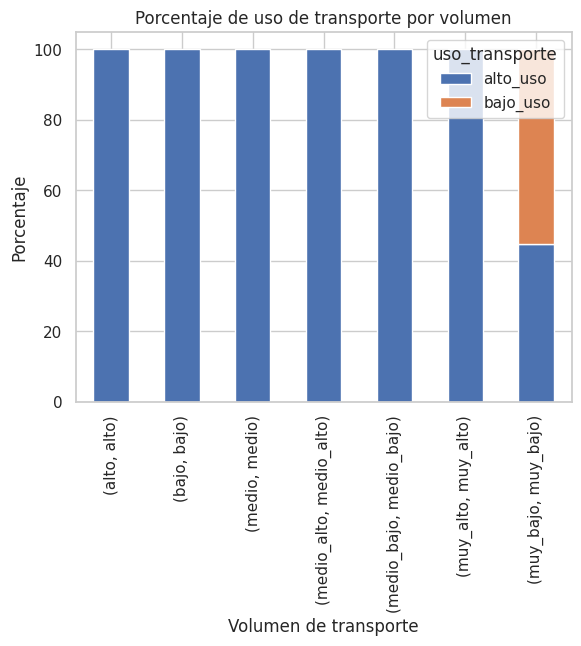

In [ ]:
df.groupby(["volumen_transporte", "uso_transporte"]).size().groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack().plot.bar(stacked=True)
plt.xlabel("Volumen de transporte")
plt.ylabel("Porcentaje")
plt.title("Porcentaje de uso de transporte por volumen")
plt.show()

In [ ]:
#ditribución por volumen de transporte
grupos = df.groupby("volumen_transporte")#separar los datos en subgrupos basados en la columna categórica
for nombre, grupo in grupos:#analizar la distribución de la columna numérica para cada subgrupo
    #calcular estadísticas descriptivas
    media = round(grupo["transporte_bruto"].mean(),2)
    mediana = round(grupo["transporte_bruto"].median(),2)
    desviacion_estandar = round(grupo["transporte_bruto"].std(),2)
    #realizar una prueba de normalidad (por ejemplo, prueba de Shapiro-Wilk)
    _, p_value = stt.shapiro(grupo["transporte_bruto"])
    if p_value > 0.05:
      print(f"Subgrupo '{nombre}':")
      print(f"Media: {media}")
      print(f"Mediana: {mediana}")
      print(f"Desviación estándar: {desviacion_estandar}")
      print("La distribución parece normal (p > 0.05)")
      print("*************")

Subgrupo 'alto':
Media: 26482.11
Mediana: 26229.0
Desviación estándar: 1208.73
La distribución parece normal (p > 0.05)
*************
Subgrupo 'medio_alto':
Media: 22205.25
Mediana: 22209.0
Desviación estándar: 1397.82
La distribución parece normal (p > 0.05)
*************
Subgrupo 'muy_alto':
Media: 32713.14
Mediana: 32041.0
Desviación estándar: 1484.36
La distribución parece normal (p > 0.05)
*************


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#fitro por grupos objetivos
subgrupos = ["muy_alto", "alto", "medio_alto"]
mascara = df["volumen_transporte"].isin(subgrupos)
df = df.loc[mascara]

In [ ]:
#tamaño nuevo df
df.shape

(40, 5)

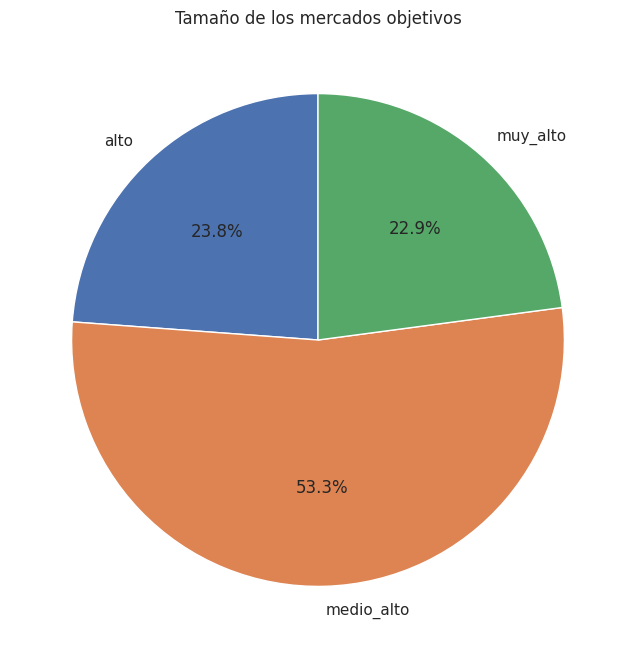

N° Codigos postales por mercado objetivo
alto 9
medio_alto 24
muy_alto 7
*****************
N° clientes por mercado objetivo
alto 238339
medio_alto 532926
muy_alto 228992
*****************
Promedio de clientes por mercado objetivo
alto 26482
medio_alto 22205
muy_alto 32713


In [ ]:
#agrupar los datos por la columna 'volumen_transporte' y calcular la suma de 'transporte_bruto' para cada categoría
datos_agrupados = df.groupby("volumen_transporte")["transporte_bruto"].sum()
plt.figure(figsize=(8, 8))
plt.pie(datos_agrupados, labels=datos_agrupados.index, autopct='%1.1f%%', startangle=90)
plt.title('Tamaño de los mercados objetivos')
plt.show()

grupos = df.groupby("volumen_transporte")
print("N° Codigos postales por mercado objetivo")
for nombre, grupo in grupos:
  print(nombre, len(grupo))
print("*****************")
datos_agrupados = df.groupby("volumen_transporte")["transporte_bruto"].sum()
print("N° clientes por mercado objetivo")
for cliente, total_clientes in datos_agrupados.items():
    print(cliente, total_clientes)
print("*****************")
promedios = df.groupby("volumen_transporte")["transporte_bruto"].mean()
print("Promedio de clientes por mercado objetivo")
for valor, promedio in promedios.items():
    print(valor, round(promedio))


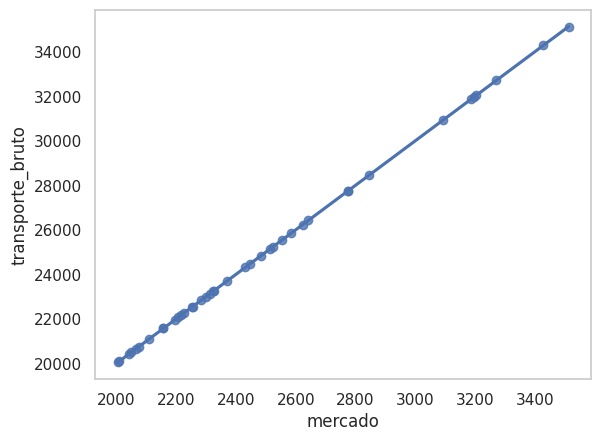

***************
Ventas promedio para el mercado objetivo: 2501


In [ ]:
#defino clientes
clientes = df.copy()
clientes["mercado"] = round(clientes["transporte_bruto"] * 0.1)
clientes["ventas"] = round(clientes["mercado"] * 0.03)
sb.regplot(x="mercado", y="transporte_bruto", data=clientes)
plt.grid(False)
plt.show()
promedio_ventas = round(clientes["mercado"].mean())
print("***************")
print(f"Ventas promedio para el mercado objetivo: {promedio_ventas}")

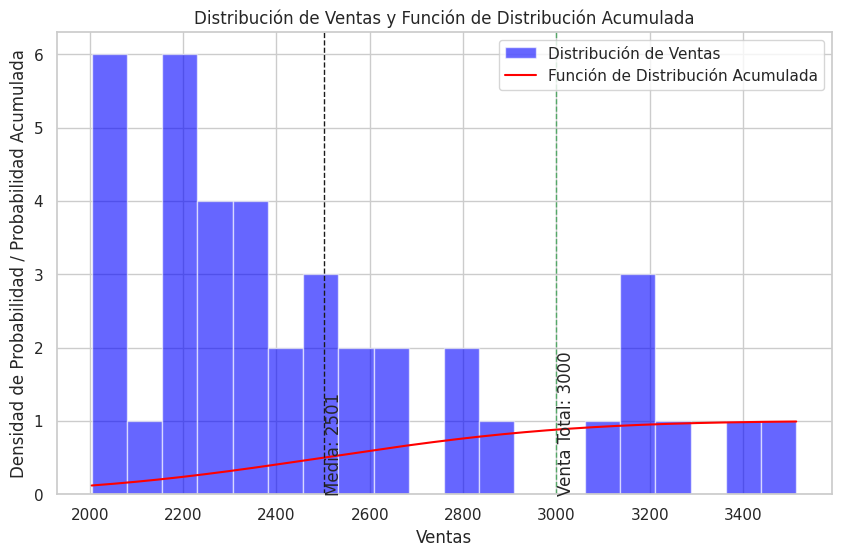

Media: 2501
Mediana: 2346
Desviación: 422
************
Probabilidad de vendes mas 3000 unidades es de: 12.0%
************
Probabilidad de vendes mas 2501 unidades es de: 50.0%


In [ ]:
#datos de ejemplo de ventas
total_ventas = round(clientes["ventas"].sum())
media = round(clientes["mercado"].mean())
mediana = round(clientes["mercado"].median())
desviacion = round(clientes["mercado"].std())
ventas = clientes["mercado"]
x = np.linspace(ventas.min(), ventas.max(), 1000)#calcular la distribución acumulada de la distribución normal
cdf = stt.norm.cdf(x, loc=media, scale=desviacion)
fig, ax = plt.subplots(figsize=(10, 6))#crear la gráfica de la distribución de ventas y su función de distribución acumulada (CDF)
ax.hist(ventas, bins=20, density=False, alpha=0.6, color="blue", label="Distribución de Ventas")#gráfica de la distribución de ventas
ax.plot(x, cdf, color="red", label="Función de Distribución Acumulada")#gráfica de la función de distribución acumulada (CDF)
ax.axvline(media, color="k", linestyle="dashed", linewidth=1)#línea vertical para la media
ax.text(media + 2, 0.04, f"Media: {media}", rotation=90)
ax.axvline(total_ventas, color="g", linestyle="dashed", linewidth=1)#línea vertical para venta total
ax.text(total_ventas + 2, 0.04, f"Venta Total: {total_ventas}", rotation=90)
ax.set_title("Distribución de Ventas y Función de Distribución Acumulada")#configuración del gráfico
ax.set_xlabel("Ventas")
ax.set_ylabel("Densidad de Probabilidad / Probabilidad Acumulada")
ax.legend()
plt.grid(True)
plt.show()
print(f"Media: {media}\nMediana: {mediana}\nDesviación: {desviacion}")
print("************")
prob = round(stt.norm.cdf((total_ventas - media)/desviacion),2)
prob = round((1-prob)*100,2)
print(f"Probabilidad de vendes mas {total_ventas} unidades es de: {prob}%")
print("************")
prob = round(stt.norm.cdf((media - media)/desviacion),2)
prob = round((1-prob)*100,2)
print(f"Probabilidad de vendes mas {media} unidades es de: {prob}%")

Recomendación del departamento de marketing: La cuota de mercado asignada, del 3%, corresponde al mercado objetivo (10%), basado en el uso del transporte público y las diversas categorías seleccionadas por su alto volumen de uso del transporte. Aunque estos datos establecen claramente un mercado y su tamaño, constituyen escenarios gestionados por analistas para definir probabilidades y cuantificar los riesgos asociados a las inversiones. El departamento de marketing debe profundizar en estas cifras mediante estudios de demanda y análisis industriales, con el objetivo de cuantificar de manera más precisa si el tamaño del mercado, la competencia y sus respectivas cuotas logran definir un volumen de ventas necesario para cubrir los costos de ventas, así como los gastos de comercialización y ventas asociados a la estrategia y la inversión. La madurez del mercado y su volumen son factores esenciales para desarrollar un presupuesto de capital y análisis de estrategias a largo plazo en cualquier proceso de inversión.

In [ ]:
#desgarda de base de cliente
from google.colab import drive
drive.mount('/content/gdrive')
clientes.to_excel("base_clientes.xlsx", index=False)
!cp base_clientes.xlsx "gdrive/My Drive/Colab Notebooks"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
clientes.head()

,codigo_postal,transporte_porcentaje,transporte_bruto,volumen_transporte,uso_transporte,mercado,ventas
2094,7030,60.9,21572,medio_alto,alto_uso,2157.0,65.0
2577,11218,60.8,20489,medio_alto,alto_uso,2049.0,61.0
2580,11373,70.2,32724,muy_alto,alto_uso,3272.0,98.0
2626,11233,70.2,21947,medio_alto,alto_uso,2195.0,66.0
2630,11215,67.8,28443,alto,alto_uso,2844.0,85.0
